In [61]:
!pwd

/content/datalab/notebooks


In [62]:
!pip freeze


absl-py==0.6.1
alembic==0.8.10
apache-airflow==1.9.0
appdirs==1.4.3
asn1crypto==0.24.0
astor==0.7.1
attrs==18.2.0
Automat==0.7.0
backcall==0.1.0
beautifulsoup4==4.7.1
bleach==2.1.2
blinker==1.4
bokeh==0.13.0
brewer2mpl==1.4.1
bs4==0.0.1
cachetools==2.1.0
certifi==2018.8.24
cffi==1.11.5
chardet==3.0.4
click==6.7
cloudpickle==0.5.5
configparser==3.5.0
constantly==15.1.0
crcmod==1.7
croniter==0.3.26
cryptography==2.3.1
cycler==0.10.0
cytoolz==0.9.0.1
dask==0.17.1
datalab==1.1.3
decorator==4.3.0
dill==0.2.6
distributed==1.21.8
docutils==0.14
entrypoints==0.2.3
fastcache==1.0.2
Flask==0.11.1
Flask-Admin==1.4.1
Flask-Cache==0.13.1
Flask-Login==0.2.11
flask-swagger==0.2.13
Flask-WTF==0.14
funcsigs==1.0.0
future==0.16.0
futures==3.0.3
gast==0.2.2
ggplot==0.6.8
gitdb2==2.0.5
GitPython==2.1.11
google-api-core==0.1.4
google-api-python-client==1.6.2
google-auth==1.6.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.1.0
google-cloud==0.34.0
google-cloud-bigquery==1.8.1
google-cloud-core==0.28.1

In [63]:
#how to install a python package with syscall to pip
!pip install google-cloud

In [64]:
%bash
apt-get -y install python-mpltoolkits.basemap

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  blt dbus file fontconfig fontconfig-config fonts-lyx formencode-i18n
  hicolor-icon-theme javascript-common libatk1.0-0 libatk1.0-data
  libavahi-client3 libavahi-common-data libavahi-common3 libblas-common
  libblas3 libcairo2 libcap-ng0 libcups2 libdatrie1 libdbus-1-3 libfontconfig1
  libfreetype6 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-common libgeos-3.5.0
  libgeos-c1v5 libgfortran3 libglade2-0 libgraphite2-3 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libharfbuzz0b libicu55 libjbig0
  libjpeg-turbo8 libjpeg8 libjs-jquery libjs-jquery-ui liblapack3 liblcms2-2
  libmagic1 libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0
  libpng12-0 libpython-stdlib libpython2.7-minimal libpython2.7-stdlib
  libtcl8.6 libthai-data libthai0 libtiff5 libtk8.6 libwebp5 libwebpmux1
  libx11-6 libx11-data libxau6 libxcb-render0 libxcb-shm0 libxcb1
  libxc

E: There were unauthenticated packages and -y was used without --allow-unauthenticated


### datalab Jupyter magic with html tag, whith bash tag

In [65]:
%html
The usual way to import python packages

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pprint import pprint as pp

import google.datalab.bigquery as bq 

import warnings
warnings.filterwarnings('ignore')

### Calls to BigQuery

In [67]:

sql="""
SELECT ARR_DELAY, DEP_DELAY
FROM `flights.tzcorr`
WHERE DEP_DELAY >= 10 AND RAND() < 0.01
"""
## RAND() < 0.01 is selection 1% of a dataset.
## but i BQ all dataset is processed
df = bq.Query(sql).execute().result().to_dataframe()

In [68]:
pp(df.shape)
df.describe()

(13643, 2)


,ARR_DELAY,DEP_DELAY
count,13579.000000,13643.000000
mean,46.117093,51.072125
std,62.190008,60.195740
min,-41.000000,10.000000
25%,11.000000,17.000000
50%,27.000000,30.000000
75%,60.000000,61.000000
max,1183.000000,1160.000000


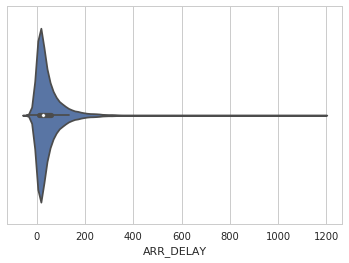

In [69]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h')
#ax.axes.set_xlim(0, 30)

In [70]:
sql = """
SELECT ARR_DELAY, DEP_DELAY
FROM `flights.tzcorr`
WHERE RAND() < 0.001
"""
df = bq.Query(sql).execute().result().to_dataframe()

In [71]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,6150.000000,6174.000000
mean,4.668943,9.841594
std,45.651237,43.506624
min,-64.000000,-27.000000
25%,-13.000000,-5.000000
50%,-5.000000,-2.000000
75%,7.000000,7.000000
max,1508.000000,1522.000000


In [72]:
df['ontime'] = df['DEP_DELAY'] < 10  #add new boolean column
df[df['ARR_DELAY']>0].head()  

,ARR_DELAY,DEP_DELAY,ontime
1,9.0,5.0,True
2,88.0,103.0,False
4,24.0,-2.0,True
7,15.0,4.0,True
10,38.0,71.0,False


(-50, 70)

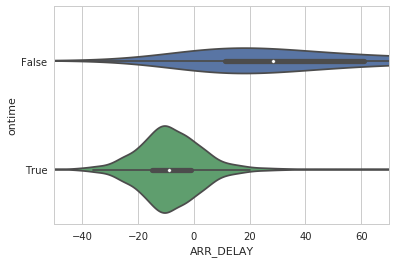

In [73]:
##let's graph the arrival delays for  ontiime = true / false
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', 
                    inner='box',orient='h', gridsize=1000)
ax.set_xlim(-50, 70)

In [74]:
depdelayquery = """
SELECT
  *
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

depdelay = bq.Query(depdelayquery).execute().result().to_dataframe()


In [75]:
depdelay.head()

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-23.0,-24.005747,11.095207,522
1,-22.0,-23.258693,12.300774,719
2,-21.0,-22.606495,12.094192,1047
3,-20.0,-21.538365,12.075209,1590
4,-19.0,-20.591874,12.133052,2215


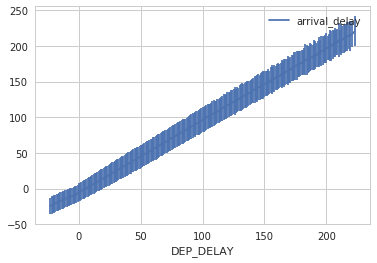

In [76]:
ax = depdelay.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

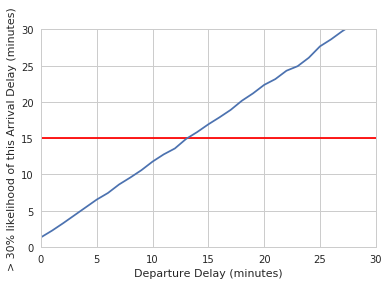

In [80]:
import matplotlib.pyplot as plt
Z_30 = 0.52   #z-value of 30% of cumulative distribution
depdelay['arr_delay_30'] = \
  (Z_30 * depdelay['stddev_arrival_delay']) + depdelay['arrival_delay']
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')



**from the chart generated it appears your decision criteria  is a departure delay of no more  than 13 minutes**

**Drop assumption distribution of flights at each depature is normal**

*compute the 30% likelihood of each departure delay with APPROX_QUANTILES func*

In [86]:
depdelayquery2 = """
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,101)[OFFSET(70)] AS arrival_delay, --approx_quantile func
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

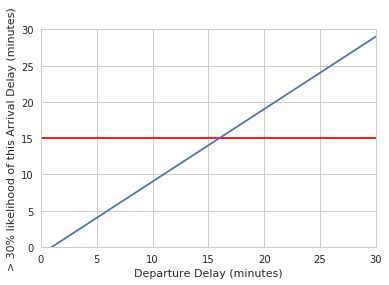

In [87]:
depdelay = bq.Query(depdelayquery2).execute().result().to_dataframe()
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')


**Now it appears your decision criteria  is a departure delay of 16 minutes**

### trainday table was created to storea 70 - 30  split on FL_DATE

In [88]:
## get training dataset
depdelayquery3 = """
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True'
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

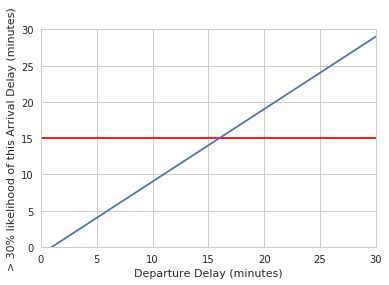

In [89]:
depdelay = bq.Query(depdelayquery3).execute().result().to_dataframe()
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

**Let’s formally evaluate how well our recommendation of 16 minutes performs on a test dataset**

In [94]:
evalquery = """
SELECT
  SUM(IF(DEP_DELAY < 16
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY < 16
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )
"""
evaldf = bq.Query(evalquery).execute().result().to_dataframe()

In [102]:
evaldf

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,1389162,72486,58359,236776


In [99]:
print("Percentage of correctly not cancelling a flight {}".format(evaldf['correct_nocancel'] / \
      (evaldf['correct_nocancel'] + evaldf['wrong_nocancel'])))

print("Percentage of correctly cancelling a flight {}".format(evaldf['correct_cancel'] / \
      (evaldf['correct_cancel'] + evaldf['wrong_cancel'])))

Percentage of correctly not cancelling a flight 0    0.950408
dtype: float64
Percentage of correctly cancelling a flight 0    0.802263
dtype: float64


**Evaluate the model on the decision border**

In [104]:
evalquery2="""
SELECT
  SUM(IF(DEP_DELAY = 15
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY = 15
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )
"""

evaldf = bq.Query(evalquery2).execute().result().to_dataframe()

In [105]:
evaldf.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,8474,3179,7459,3195


In [106]:
print("Percentage of correctly not cancelling a flight {}".format(evaldf['correct_nocancel'] / \
      (evaldf['correct_nocancel'] + evaldf['wrong_nocancel'])))

print("Percentage of correctly cancelling a flight {}".format(evaldf['correct_cancel'] / \
      (evaldf['correct_cancel'] + evaldf['wrong_cancel'])))

Percentage of correctly not cancelling a flight 0    0.727195
dtype: float64
Percentage of correctly cancelling a flight 0    0.299887
dtype: float64


### cancelling probability is close to target of 30% but we miss some flights which we should not cancel